C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


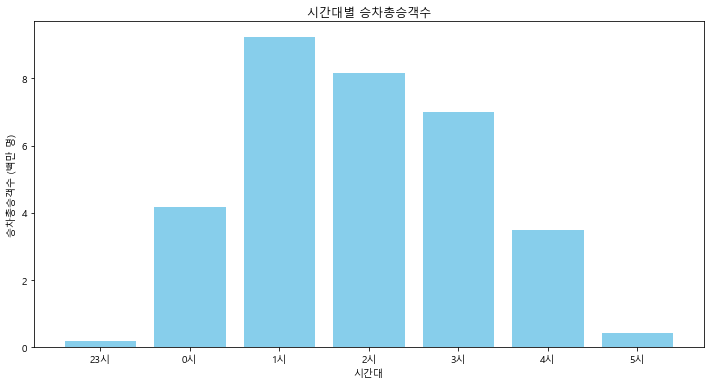

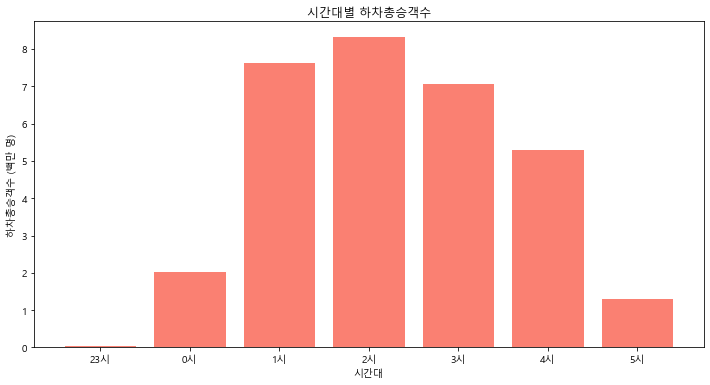

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 파일 경로
folder_path = r'C:\Users\User\Desktop\BigData\Dataset\NBusDataset'

# 2015년부터 2023년 파일들을 불러오기
files_to_read = [f'{year}_NBusData.csv' for year in range(2015, 2024)]

df_list = []  # 각 CSV 파일의 데이터프레임을 저장할 리스트

for file in files_to_read:
    file_path = os.path.join(folder_path, file)
    # 'cp949' 인코딩을 사용하여 파일 읽기
    df = pd.read_csv(file_path, encoding='cp949')
    df_list.append(df)

# 모든 데이터프레임을 합치기
merged_df = pd.concat(df_list, ignore_index=True)

# 시간대별 승차총승객수와 하차총승객수의 합 계산
time_columns_boarding = [f'{hour}시승차총승객수' for hour in range(24)]
time_columns_alighting = [f'{hour}시하차총승객수' for hour in range(24)]

# 시간대별로 승차총승객수와 하차총승객수의 합 계산
time_passengers_boarding = merged_df[time_columns_boarding].sum()
time_passengers_alighting = merged_df[time_columns_alighting].sum()

# 백만 단위로 변환
time_passengers_boarding_million = time_passengers_boarding / 1e6
time_passengers_alighting_million = time_passengers_alighting / 1e6

# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 'Malgun Gothic' 폰트의 경로로 수정
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 23시부터 1시까지 시각화
selected_hours = [23, 0, 1, 2, 3, 4, 5]

plt.figure(figsize=(12, 6))
plt.bar(range(len(selected_hours)), time_passengers_boarding_million.iloc[selected_hours].values, color='skyblue')
plt.xticks(range(len(selected_hours)), [f'{hour}시' for hour in selected_hours])
plt.xlabel('시간대')
plt.ylabel('승차총승객수 (백만 명)')
plt.title('시간대별 승차총승객수')

plt.figure(figsize=(12, 6))
plt.bar(range(len(selected_hours)), time_passengers_alighting_million.iloc[selected_hours].values, color='salmon')
plt.xticks(range(len(selected_hours)), [f'{hour}시' for hour in selected_hours])
plt.xlabel('시간대')
plt.ylabel('하차총승객수 (백만 명)')
plt.title('시간대별 하차총승객수')

plt.show()


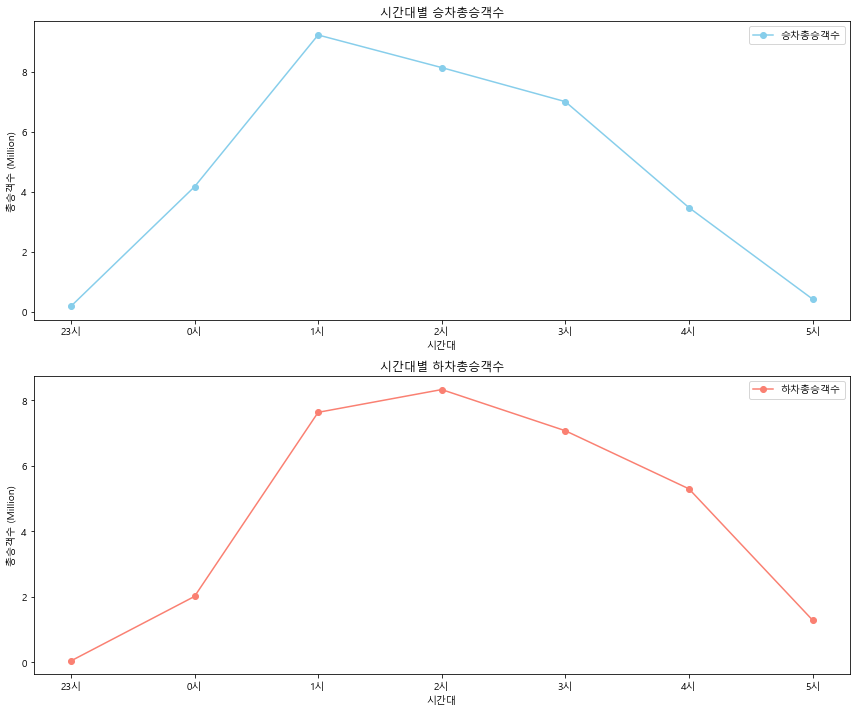

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 파일 경로
folder_path = r'C:\Users\User\Desktop\BigData\Dataset\NBusDataset'

# 2015년부터 2023년 파일들을 불러오기
files_to_read = [f'{year}_NBusData.csv' for year in range(2015, 2024)]

df_list = []  # 각 CSV 파일의 데이터프레임을 저장할 리스트

for file in files_to_read:
    file_path = os.path.join(folder_path, file)
    # 'cp949' 인코딩을 사용하여 파일 읽기
    df = pd.read_csv(file_path, encoding='cp949')
    df_list.append(df)

# 모든 데이터프레임을 합치기
merged_df = pd.concat(df_list, ignore_index=True)

# 시간대별 승차총승객수와 하차총승객수의 합 계산
time_columns_boarding = [f'{hour}시승차총승객수' for hour in range(24)]
time_columns_alighting = [f'{hour}시하차총승객수' for hour in range(24)]

# 시간대별로 승차총승객수와 하차총승객수의 합 계산
time_passengers_boarding = merged_df[time_columns_boarding].sum()
time_passengers_alighting = merged_df[time_columns_alighting].sum()

# 백만 단위로 변환
time_passengers_boarding_million = time_passengers_boarding / 1e6
time_passengers_alighting_million = time_passengers_alighting / 1e6

# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 'Malgun Gothic' 폰트의 경로로 수정
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 23시부터 5시까지 라인 플롯
selected_hours = [23, 0, 1, 2, 3, 4, 5]

# 그래프를 나눠서 출력
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# 승차총승객수 라인 플롯
axes[0].plot(time_passengers_boarding_million.iloc[selected_hours], marker='o', label='승차총승객수', color='skyblue')
axes[0].set_xticks(range(len(selected_hours)))
axes[0].set_xticklabels([f'{hour}시' for hour in selected_hours])
axes[0].set_xlabel('시간대')
axes[0].set_ylabel('총승객수 (Million)')
axes[0].set_title('시간대별 승차총승객수')
axes[0].legend()

# 하차총승객수 라인 플롯
axes[1].plot(time_passengers_alighting_million.iloc[selected_hours], marker='o', label='하차총승객수', color='salmon')
axes[1].set_xticks(range(len(selected_hours)))
axes[1].set_xticklabels([f'{hour}시' for hour in selected_hours])
axes[1].set_xlabel('시간대')
axes[1].set_ylabel('총승객수 (Million)')
axes[1].set_title('시간대별 하차총승객수')
axes[1].legend()

plt.tight_layout()
plt.show()
